# Import statements

In [1]:
import sklearn
import pandas as pd
import numpy as np
import matplotlib
import csv
import math
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
import statsmodels.api as sm
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.ensemble import RandomForestClassifier
from imblearn import under_sampling, over_sampling
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
from sklearn.ensemble import AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.manifold import TSNE
import seaborn as sns

# Preprocessing the data

## The data we obtained actually had two datasets each of which contained relevant information, so first some irrelevant features were dropped from each of these

In [2]:
df1= pd.read_csv ('/Users/gaganmalik/Documents/ML/Project/bloodpressure_data.csv')

In [3]:
df1.drop(['Unnamed: 0','X','Waist Circum','Arm Circum','Head Circum'],axis='columns',inplace=True)

In [4]:
df2=pd.read_csv ('/Users/gaganmalik/Documents/ML/Project/demographic_data.csv')

In [5]:
df2.drop(['Unnamed: 0','BirthCountry','Citizenship','USStayLength','PeopleHH','HHIncome',],axis='columns',inplace=True)

## For this dataset PregnancyStatus of only 1309 people is known so dropping this feature, also dropping RaceNHA becuase it is redudant to keep if we are keeping Race feature and the information of family income is captured by PovertyRatio so keeping PovertyRatio and removing FamilyIncome

In [6]:
df2.drop(['PregnancyStatus','RaceNHA','FamilyIncome'],axis='columns',inplace=True)

In [7]:
data=pd.merge(df1, df2, how='inner', on='SEQN', left_on=None, right_on=None,left_index=False, right_index=False, sort=True)

## Merged Data

In [8]:
data

,SEQN,BP Systolic,BP Dystolic,Weight,Height,BMI,SAD,is_diabetic,Gender,AgeYears,Race,EduLevelAdult,MaritalStatus,PeopleFamily,PovertyRatio
0,73557,122.00,76.00,78.3,171.3,26.7,20.50,1,Male,69.0,NHBlack,HighSchool/GED,Separated,3,0.84
1,73558,156.00,80.00,89.5,176.8,28.6,24.20,1,Male,54.0,NHWhite,HighSchool/GED,Married,4,1.78
2,73559,140.00,76.00,88.9,175.3,28.9,25.80,1,Male,72.0,NHWhite,College/AA,Married,2,4.51
3,73560,108.00,34.00,32.2,137.3,17.1,14.80,0,Male,9.9,NHWhite,3Grade,NaN,4,2.52
4,73561,136.00,88.00,52.0,162.4,19.7,18.44,1,Female,73.0,NHWhite,College/Above,Married,2,5.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9808,83727,110.00,74.00,71.8,171.3,24.5,19.00,0,Male,26.0,OtherHisp,College/Above,NeverMarried,5,NaN
9809,83728,103.92,31.62,11.3,84.4,15.9,11.85,0,Female,2.0,MexAmerican,NaN,NaN,4,1.95
9810,83729,136.00,82.00,89.6,162.3,34.0,24.40,0,Female,42.0,NHBlack,College/Above,Divorced,1,3.66
9811,83730,94.34,12.98,22.8,119.1,16.1,11.83,0,Male,7.0,OtherHisp,NoEdu/KG,NaN,4,1.05


## Cleaning the data of NaN and other not required values, like "Refused" or "DontKnow" answers

In [9]:
keep_val=[]
for i in range(len(data)):
    if(type(data['MaritalStatus'][i])==str and type(data['EduLevelAdult'][i])==str and math.isnan(data['PovertyRatio'][i])==False):
        if(data['MaritalStatus'][i]!="Refused" and data['MaritalStatus'][i]!="DontKnow"):
            if(data['EduLevelAdult'][i]!="Refused" and data['EduLevelAdult'][i]!="DontKnow"):
                keep_val.append(i)
                # keep_val contain rows in the data that we want to keep

In [10]:
total=[i for i in range(len(data))]
remove_val=list(set(total).difference(keep_val))

Samples to be removed

In [12]:
len(remove_val)

4662

In [13]:
data1=data.drop(remove_val)
data1 = data1.reset_index()
data1.drop(['index','SEQN'],axis=1,inplace=True)

In [14]:
data1

,BP Systolic,BP Dystolic,Weight,Height,BMI,SAD,is_diabetic,Gender,AgeYears,Race,EduLevelAdult,MaritalStatus,PeopleFamily,PovertyRatio
0,122.00,76.0,78.3,171.3,26.7,20.50,1,Male,69.0,NHBlack,HighSchool/GED,Separated,3,0.84
1,156.00,80.0,89.5,176.8,28.6,24.20,1,Male,54.0,NHWhite,HighSchool/GED,Married,4,1.78
2,140.00,76.0,88.9,175.3,28.9,25.80,1,Male,72.0,NHWhite,College/AA,Married,2,4.51
3,136.00,88.0,52.0,162.4,19.7,18.44,1,Female,73.0,NHWhite,College/Above,Married,2,5.00
4,160.00,82.0,105.0,158.7,41.7,29.10,1,Male,56.0,MexAmerican,College/AA,Divorced,1,4.79
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5146,108.00,72.0,79.5,176.2,25.6,19.20,0,Male,52.0,NHWhite,College/Above,Married,2,5.00
5147,132.50,60.0,99.5,173.5,33.1,24.80,1,Male,61.0,MexAmerican,9-11Grade,Married,3,3.53
5148,164.00,66.0,77.1,176.0,24.9,21.00,0,Male,80.0,NHWhite,HighSchool/GED,Married,2,3.09
5149,121.94,74.2,79.0,171.7,26.8,23.00,0,Male,40.0,MexAmerican,>9Grade,Separated,2,3.81


In [15]:
for i in range(len(data1)):
    if(data1['EduLevelAdult'][i] in ['7Grade','5Grade','4Grade','6Grade','>5Grade','3Grade','1Grade','8Grade','2Grade','NoEdu/KG']):
        data1['EduLevelAdult'][i]='>8 Grade'
    elif(data1['EduLevelAdult'][i] in ['College/Above','>HighSchool','College/AA','12Grade']):
        data1['EduLevelAdult'][i]='College'
    elif(data1['EduLevelAdult'][i] in ['GED','10Grade','HighSchool/GED','HighSchool']):
        data1['EduLevelAdult'][i]='Highschool'
    else:
        data1['EduLevelAdult'][i]='9-11th grade'

<ipython-input-15-a2db7306d305>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1['EduLevelAdult'][i]='Highschool'
<ipython-input-15-a2db7306d305>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1['EduLevelAdult'][i]='College'
<ipython-input-15-a2db7306d305>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1['EduLevelAdult'][i]='9-11th grade'


In [16]:
for i in range(len(data1)):
    if(data1['Race'][i]=='MexAmerican'):
        data1['Race'][i]='Mexican'
    elif(data1['Race'][i]=='NHWhite'):
        data1['Race'][i]='White'
    elif(data1['Race'][i]=='NHBlack'):
        data1['Race'][i]='Black'
    elif(data1['Race'][i]=='OtherHisp'):
        data1['Race'][i]='Hispanic'
    else:
        data1['Race'][i]='Other'

<ipython-input-16-7045e8da0553>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1['Race'][i]='Black'
<ipython-input-16-7045e8da0553>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1['Race'][i]='White'
<ipython-input-16-7045e8da0553>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1['Race'][i]='Mexican'
<ipython-input-16-7045e8da0553>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Da

In [17]:
data1_col=list(data1.columns)

Column Names

In [18]:
for i in data1_col:
    print(i)

BP Systolic
BP Dystolic
Weight
Height
BMI
SAD
is_diabetic
Gender
AgeYears
Race
EduLevelAdult
MaritalStatus
PeopleFamily
PovertyRatio


In [19]:
demo={}
for i in data1_col:
    if(i!='is_diabetic' and i not in ['Gender','Race','EduLevelAdult','MaritalStatus']):
        demo[i]={}
        demo[i]['total']=[np.mean(list(data1[i])),np.std(list(data1[i]))]
        diab=[]
        non_diab=[]
        for j in range(len(data1)):
            if(data1['is_diabetic'][j]==1):
                diab.append(data1[i][j])
            else:
                non_diab.append(data1[i][j])
        demo[i]['Diabetic']=[np.mean(diab),np.std(diab)]
        demo[i]['Control']=[np.mean(non_diab),np.std(non_diab)]

In [20]:
demo

{'BP Systolic': {'total': [123.54929916521063, 17.548784269791934],
  'Diabetic': [128.97333690987125, 17.97350400939567],
  'Control': [120.47342257377548, 16.530564397291037]},
 'BP Dystolic': {'total': [69.44973209085614, 13.069221679791347],
  'Diabetic': [68.45053111587983, 14.51189782280845],
  'Control': [70.01636142379068, 12.138893938697725]},
 'Weight': {'total': [81.55649970879442, 22.403158013780974],
  'Diabetic': [86.28553111587982, 23.43414042329823],
  'Control': [78.87474901125645, 21.33609030465205]},
 'Height': {'total': [167.09295670743543, 10.263652873635795],
  'Diabetic': [166.0746244635193, 10.35392350984947],
  'Control': [167.67043504715545, 10.16688704145698]},
 'BMI': {'total': [29.110817317025823, 7.226511828063696],
  'Diabetic': [31.159168454935624, 7.523433434924145],
  'Control': [27.949233343474294, 6.783087978755729]},
 'SAD': {'total': [22.80993205202873, 4.572919627425468],
  'Diabetic': [24.735595493562233, 4.5234048915357326],
  'Control': [21.717

## Descriptive statistics for the data

In [21]:
pd.DataFrame.from_dict(demo).transpose()

,total,Diabetic,Control
BP Systolic,"[123.54929916521063, 17.548784269791934]","[128.97333690987125, 17.97350400939567]","[120.47342257377548, 16.530564397291037]"
BP Dystolic,"[69.44973209085614, 13.069221679791347]","[68.45053111587983, 14.51189782280845]","[70.01636142379068, 12.138893938697725]"
Weight,"[81.55649970879442, 22.403158013780974]","[86.28553111587982, 23.43414042329823]","[78.87474901125645, 21.33609030465205]"
Height,"[167.09295670743543, 10.263652873635795]","[166.0746244635193, 10.35392350984947]","[167.67043504715545, 10.16688704145698]"
BMI,"[29.110817317025823, 7.226511828063696]","[31.159168454935624, 7.523433434924145]","[27.949233343474294, 6.783087978755729]"
SAD,"[22.80993205202873, 4.572919627425468]","[24.735595493562233, 4.5234048915357326]","[21.71792211743231, 4.227490951003439]"
AgeYears,"[49.06755969714619, 17.521257517713096]","[61.16148068669528, 13.688134219404239]","[42.209309400669305, 15.647858954138018]"
PeopleFamily,"[3.044069112793632, 1.7206927667746852]","[2.6915236051502145, 1.6066562979502574]","[3.2439914815941586, 1.750858699469204]"
PovertyRatio,"[2.4980683362453893, 1.6474661058655677]","[2.5532510729613733, 1.619081546075489]","[2.466775174931548, 1.662533631634888]"


In [22]:
data1.groupby('Gender').mean()

,BP Systolic,BP Dystolic,Weight,Height,BMI,SAD,is_diabetic,AgeYears,PeopleFamily,PovertyRatio
Gender,,,,,,,,,,
Female,121.868886,68.351100,76.624001,160.522693,29.656880,22.415223,0.374071,49.136701,3.076152,2.425587
Male,125.388939,70.652464,86.956373,174.285779,28.513013,23.242041,0.348516,48.991867,3.008947,2.577418


In [23]:
data1.groupby('Race').mean()

,BP Systolic,BP Dystolic,Weight,Height,BMI,SAD,is_diabetic,AgeYears,PeopleFamily,PovertyRatio
Race,,,,,,,,,,
Black,127.157633,70.071430,87.690663,169.355994,30.594517,23.936089,0.412879,48.696970,2.871212,2.179564
Hispanic,122.569908,68.024506,77.895655,163.610276,28.962322,22.528414,0.308046,47.981609,3.301149,2.204046
Mexican,122.937026,69.240986,81.643174,163.530077,30.411479,23.243313,0.328197,46.983051,3.872111,1.847643
Other,121.243096,70.689529,70.365532,164.210027,25.904939,20.478304,0.277254,45.313594,3.475101,3.075141
White,122.987795,69.087196,83.043902,168.671230,29.126534,22.979409,0.385802,51.274691,2.697090,2.699832


In [24]:
data1.groupby('EduLevelAdult').mean()

,BP Systolic,BP Dystolic,Weight,Height,BMI,SAD,is_diabetic,AgeYears,PeopleFamily,PovertyRatio
EduLevelAdult,,,,,,,,,,
9-11th grade,126.956682,68.451536,79.221762,164.567926,29.172347,23.074892,0.415646,52.401508,3.481621,1.447418
College,121.683423,69.693164,82.015101,168.077123,28.920178,22.565337,0.338230,47.770072,2.884523,3.053823
Highschool,125.136733,69.747721,82.532279,166.919613,29.534480,23.183801,0.372313,49.291488,3.046432,2.057868


In [25]:
data1.groupby('MaritalStatus').mean()

,BP Systolic,BP Dystolic,Weight,Height,BMI,SAD,is_diabetic,AgeYears,PeopleFamily,PovertyRatio
MaritalStatus,,,,,,,,,,
Divorced,125.797737,71.174309,81.559651,165.792712,29.549018,23.286406,0.430948,54.663894,2.114809,2.103860
LivingIn,119.462818,68.647236,82.133035,168.674146,28.759621,22.118374,0.143631,37.075881,3.308943,1.870027
Married,123.685849,70.162652,82.043129,167.587111,29.100233,22.896138,0.399699,51.409842,3.465440,2.934444
NeverMarried,119.386107,68.251670,82.313268,168.731250,28.852172,22.245676,0.182377,34.798156,2.821721,2.106076
Separated,123.155644,72.160245,82.757117,165.313742,30.153129,23.233681,0.337423,49.613497,2.773006,1.572761
Widowed,133.866526,64.421711,75.124000,160.707658,29.050158,23.391474,0.671053,71.868421,1.992105,2.078184


## Data is unbalanced, for the first approach...

In [26]:
dia_lab=0
non_lab=0
for i in range(len(data1)):
    if(data1['is_diabetic'][i]==1):
        dia_lab+=1
    else:
        non_lab+=1

In [27]:
print("Diabetic samples are "+str(dia_lab)+" and non diabetic samples are "+str(non_lab))

Diabetic samples are 1864 and non diabetic samples are 3287


In [28]:
col_data1=data1.columns.tolist()

In [29]:
col_data1_2=col_data1[:6]+col_data1[7:]+col_data1[6:7]

In [30]:
data1=data1[col_data1_2]

# Feature selection 

## Using Logistic regression, where regression coefficients are calculated and the ones having p value <=0.005 are kept as final features, to take such a low value of p implies that the features are statistically significant

### Creating copy of existing dataframe, copies are not affected by change to the original dataframe

In [31]:
data1_copy=data1.copy()

### Dropping Race column here because it was giving nan values for the regression coefficient calculated using Logistic regression

In [32]:
data1_copy.drop('Race',axis=1,inplace=True)

### Assigning numerical values to categorical features for passing to ML models

In [33]:
for i in range(len(data1_copy)):
    if(data1_copy['MaritalStatus'][i]=='Married'):
        data1_copy['MaritalStatus'][i]=np.int64(1)
    elif(data1_copy['MaritalStatus'][i]=='Widowed'):
        data1_copy['MaritalStatus'][i]=np.int64(2)
    else:
        data1_copy['MaritalStatus'][i]=np.int64(0)

<ipython-input-33-f3eb57319dad>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1_copy['MaritalStatus'][i]=np.int64(0)
<ipython-input-33-f3eb57319dad>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1_copy['MaritalStatus'][i]=np.int64(1)
<ipython-input-33-f3eb57319dad>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1_copy['MaritalStatus'][i]=np.int64(2)


In [34]:
for i in range(len(data1_copy)):
    if(data1_copy['Gender'][i]=='Male'):
        data1_copy['Gender'][i]=np.int64(0)
    else:
        data1_copy['Gender'][i]=np.int64(1)

<ipython-input-34-6f6c9500717b>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1_copy['Gender'][i]=np.int64(0)
<ipython-input-34-6f6c9500717b>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1_copy['Gender'][i]=np.int64(1)


In [35]:
for i in range(len(data1_copy)):
    if(data1_copy['EduLevelAdult'][i]=='Highschool'):
        data1_copy['EduLevelAdult'][i]=np.int64(1)
    elif(data1_copy['EduLevelAdult'][i]=='College'):
        data1_copy['EduLevelAdult'][i]=np.int64(2)
    else:
        data1_copy['EduLevelAdult'][i]=np.int64(0)

<ipython-input-35-c73b1c92ec0d>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1_copy['EduLevelAdult'][i]=np.int64(1)
<ipython-input-35-c73b1c92ec0d>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1_copy['EduLevelAdult'][i]=np.int64(2)
<ipython-input-35-c73b1c92ec0d>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1_copy['EduLevelAdult'][i]=np.int64(0)


In [36]:
data1_copy

,BP Systolic,BP Dystolic,Weight,Height,BMI,SAD,Gender,AgeYears,EduLevelAdult,MaritalStatus,PeopleFamily,PovertyRatio,is_diabetic
0,122.00,76.0,78.3,171.3,26.7,20.50,0,69.0,1,0,3,0.84,1
1,156.00,80.0,89.5,176.8,28.6,24.20,0,54.0,1,1,4,1.78,1
2,140.00,76.0,88.9,175.3,28.9,25.80,0,72.0,2,1,2,4.51,1
3,136.00,88.0,52.0,162.4,19.7,18.44,1,73.0,2,1,2,5.00,1
4,160.00,82.0,105.0,158.7,41.7,29.10,0,56.0,2,0,1,4.79,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5146,108.00,72.0,79.5,176.2,25.6,19.20,0,52.0,2,1,2,5.00,0
5147,132.50,60.0,99.5,173.5,33.1,24.80,0,61.0,0,1,3,3.53,1
5148,164.00,66.0,77.1,176.0,24.9,21.00,0,80.0,1,1,2,3.09,0
5149,121.94,74.2,79.0,171.7,26.8,23.00,0,40.0,0,0,2,3.81,0


In [37]:
X_data1_copy = data1_copy.loc[:, data1_copy.columns != 'is_diabetic']
Y_data1_copy = data1_copy.loc[:, data1_copy.columns == 'is_diabetic']

TSNE

In [38]:
tsne = TSNE(n_components=2, random_state=0)
transformed_data = tsne.fit_transform(X_data1_copy)
print(transformed_data)

[[  1.5807135  16.277922 ]
 [-37.248436   49.57539  ]
 [-30.243563   37.40842  ]
 ...
 [-24.574854   69.6437   ]
 [  9.09761   -18.643034 ]
 [-26.29006    -4.323844 ]]


### Recursive features elimination using logistic regression

In [39]:
logreg_1 = LogisticRegression(max_iter=500)
rfe_1 = RFE(logreg_1, 8)

/Users/gaganmalik/miniforge3/envs/torch/lib/python3.8/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass n_features_to_select=8 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


In [40]:
data1_copy.columns

Index(['BP Systolic', 'BP Dystolic', 'Weight', 'Height', 'BMI', 'SAD',
       'Gender', 'AgeYears', 'EduLevelAdult', 'MaritalStatus', 'PeopleFamily',
       'PovertyRatio', 'is_diabetic'],
      dtype='object')

In [41]:
rfe_1 = rfe_1.fit(X_data1_copy,Y_data1_copy.values.ravel())
#print(rfe_1.support_)
#print(rfe_1.ranking_)

### Logit model calculates the regression coefficient values with associated p value 

In [42]:
logit_model_1=sm.Logit(Y_data1_copy,X_data1_copy.astype(float))
result_1=logit_model_1.fit()
print(result_1.summary2())

Optimization terminated successfully.
         Current function value: 0.464983
         Iterations 6
                         Results: Logit
Model:              Logit            Pseudo R-squared: 0.290    
Dependent Variable: is_diabetic      AIC:              4814.2544
Date:               2021-05-14 16:57 BIC:              4892.8178
No. Observations:   5151             Log-Likelihood:   -2395.1  
Df Model:           11               LL-Null:          -3371.3  
Df Residuals:       5139             LLR p-value:      0.0000   
Converged:          1.0000           Scale:            1.0000   
No. Iterations:     6.0000                                      
----------------------------------------------------------------
                 Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
----------------------------------------------------------------
BP Systolic     -0.0029   0.0023  -1.2683 0.2047 -0.0075  0.0016
BP Dystolic     -0.0081   0.0030  -2.6912 0.0071 -0.0140 -0.0022
Weight       

### Based on the regression coefficient values extracted using logit model we use 7 features as they have p value close to 0.005 or less than that signifying that they are statistically significant

In [43]:
cols_keep_1=['Weight', 'Height', 'BMI', 'SAD','AgeYears','Gender','BP Dystolic']

In [44]:
X_data1_copy

,BP Systolic,BP Dystolic,Weight,Height,BMI,SAD,Gender,AgeYears,EduLevelAdult,MaritalStatus,PeopleFamily,PovertyRatio
0,122.00,76.0,78.3,171.3,26.7,20.50,0,69.0,1,0,3,0.84
1,156.00,80.0,89.5,176.8,28.6,24.20,0,54.0,1,1,4,1.78
2,140.00,76.0,88.9,175.3,28.9,25.80,0,72.0,2,1,2,4.51
3,136.00,88.0,52.0,162.4,19.7,18.44,1,73.0,2,1,2,5.00
4,160.00,82.0,105.0,158.7,41.7,29.10,0,56.0,2,0,1,4.79
...,...,...,...,...,...,...,...,...,...,...,...,...
5146,108.00,72.0,79.5,176.2,25.6,19.20,0,52.0,2,1,2,5.00
5147,132.50,60.0,99.5,173.5,33.1,24.80,0,61.0,0,1,3,3.53
5148,164.00,66.0,77.1,176.0,24.9,21.00,0,80.0,1,1,2,3.09
5149,121.94,74.2,79.0,171.7,26.8,23.00,0,40.0,0,0,2,3.81


In [45]:
X_LR_1=X_data1_copy[cols_keep_1]
Y_LR_1=Y_data1_copy.values.ravel()

### After keeping the required columns we can see that the regression coefficient for all the kept features is close to 0.005 or lower

In [46]:
logit_model_2=sm.Logit(Y_LR_1,X_LR_1.astype(float))
result_2=logit_model_2.fit()
print(result_2.summary2())

Optimization terminated successfully.
         Current function value: 0.465971
         Iterations 6
                         Results: Logit
Model:              Logit            Pseudo R-squared: 0.288    
Dependent Variable: y                AIC:              4814.4297
Date:               2021-05-14 16:58 BIC:              4860.2583
No. Observations:   5151             Log-Likelihood:   -2400.2  
Df Model:           6                LL-Null:          -3371.3  
Df Residuals:       5144             LLR p-value:      0.0000   
Converged:          1.0000           Scale:            1.0000   
No. Iterations:     6.0000                                      
----------------------------------------------------------------
                 Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
----------------------------------------------------------------
Weight           0.0431   0.0052   8.2485 0.0000  0.0328  0.0533
Height          -0.0464   0.0019 -23.9196 0.0000 -0.0502 -0.0426
BMI          

/Users/gaganmalik/miniforge3/envs/torch/lib/python3.8/site-packages/seaborn/axisgrid.py:1969: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


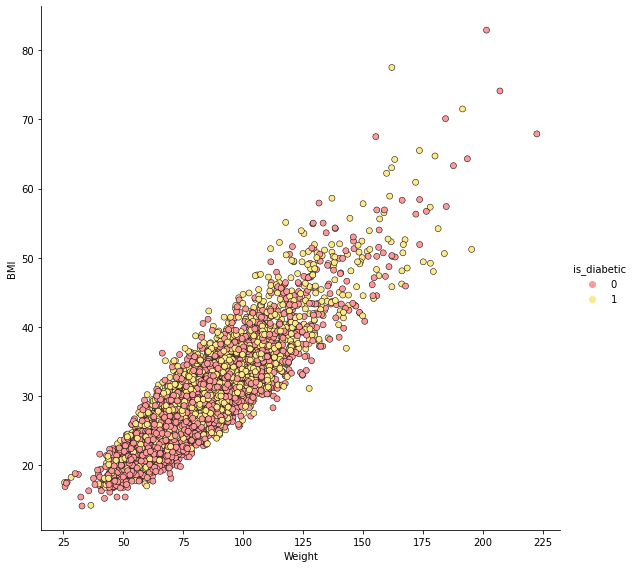

In [47]:
jp = sns.pairplot(data1_copy, x_vars=["Weight"], y_vars=["BMI"], size=8,
                  hue="is_diabetic", palette={0: "#FF9999", 1: "#FFE888"},
                  plot_kws=dict(edgecolor="k", linewidth=0.5))

## CV protocol cross fold validation for k=2,5,10 folds

## Decision Tree

In [48]:
dclf_LR_1_2 = DecisionTreeClassifier()
scores_LR_1_2 = cross_val_score(dclf_LR_1_2, X_LR_1, Y_LR_1, cv=2)

In [49]:
scores_LR_1_2.mean()

0.6983109208225291

In [50]:
dclf_LR_1_5 = DecisionTreeClassifier()
scores_LR_1_5 = cross_val_score(dclf_LR_1_5, X_LR_1, Y_LR_1, cv=5)

In [51]:
scores_LR_1_5.mean()

0.6792899720320549

In [52]:
dclf_LR_1_10 = DecisionTreeClassifier()
scores_LR_1_10 = cross_val_score(dclf_LR_1_10, X_LR_1, Y_LR_1, cv=10)

In [53]:
scores_LR_1_10.mean()

0.6781233536539475

In [54]:
X_trainn, X_testt, Y_trainn, Y_testt = train_test_split(X_LR_1, Y_LR_1, test_size=0.3)
dctree = DecisionTreeClassifier()
dctree.fit(X_trainn, Y_trainn)
pr = dctree.predict(X_testt)
ubdts = dctree.score(X_testt, Y_testt)

In [55]:
decisionTF1 = metrics.precision_score(Y_testt, pr)
decisionTF1

0.5660714285714286

## Naive Bayes

In [56]:
gnb_LR_1_2 = GaussianNB()
scores_LR_2_2=cross_val_score(gnb_LR_1_2, X_LR_1, Y_LR_1, cv=2)

In [57]:
scores_LR_2_2.mean()

0.7548055991075198

In [58]:
gnb_LR_1_5 = GaussianNB()
scores_LR_2_5=cross_val_score(gnb_LR_1_5, X_LR_1, Y_LR_1, cv=5)

In [59]:
scores_LR_2_5.mean()

0.7577164219863833

In [60]:
gnb_LR_1_10 = GaussianNB()
scores_LR_2_10=cross_val_score(gnb_LR_1_10, X_LR_1, Y_LR_1, cv=10)

In [61]:
scores_LR_2_10.mean()

0.7561684353127116

In [62]:
gnbbb = GaussianNB()
X_train_gnb, X_test_gnb, Y_train_gnb, Y_test_gnb = train_test_split(X_LR_1, Y_LR_1, test_size=0.3)
gnbbb.fit(X_train_gnb, Y_train_gnb)
pr_gnbb = gnbbb.predict(X_test_gnb)
gnbF1 = metrics.precision_score(Y_test_gnb, pr_gnbb)
ubgnbs = gnbbb.score(X_test_gnb, Y_test_gnb)
gnbF1

0.6865671641791045

## ADA Boost

In [63]:
type(Y_LR_1)

numpy.ndarray

In [64]:
ada_LR_1_2 = AdaBoostClassifier(n_estimators=100, random_state=0)
scores_LR_3_2=cross_val_score(ada_LR_1_2, X_LR_1, Y_LR_1, cv=2)

In [65]:
scores_LR_3_2.mean()

0.7614055056383042

In [66]:
ada_LR_1_5 = AdaBoostClassifier(n_estimators=100, random_state=0)
scores_LR_3_5=cross_val_score(ada_LR_1_5, X_LR_1, Y_LR_1, cv=5)

In [67]:
scores_LR_3_5.mean()

0.7641238123040125

In [68]:
ada_LR_1_10 = AdaBoostClassifier(n_estimators=100, random_state=0)
scores_LR_3_10=cross_val_score(ada_LR_1_10, X_LR_1, Y_LR_1, cv=10)

In [69]:
scores_LR_3_10.mean()

0.7670441032588244

In [70]:
AdaB = AdaBoostClassifier(n_estimators=100, random_state=0)
X_train_A, X_test_A, Y_train_A, Y_test_A = train_test_split(X_LR_1, Y_LR_1, test_size=0.3)
AdaB.fit(X_train_A, Y_train_A)
pr_ada = AdaB.predict(X_test_A)
AdaF1 = metrics.precision_score(Y_test_A, pr_ada)
ubadas = AdaB.score(X_test_A, Y_test_A)
AdaF1

0.6879562043795621

## Random Forest

In [71]:
RF_LR_1_2 = RandomForestClassifier(max_depth=30, random_state=0)
scores_LR_4_2 = cross_val_score(RF_LR_1_2, X_LR_1, Y_LR_1, cv=2)

In [72]:
scores_LR_4_2.mean()

0.7536397967798347

In [73]:
RF_LR_1_5 = RandomForestClassifier(max_depth=30, random_state=0)
scores_LR_4_5 = cross_val_score(RF_LR_1_5, X_LR_1, Y_LR_1, cv=5)

In [74]:
scores_LR_4_5.mean()

0.7553846298720254

In [75]:
RF_LR_1_10 = RandomForestClassifier(max_depth=30, random_state=0)
scores_LR_4_10 = cross_val_score(RF_LR_1_10, X_LR_1, Y_LR_1, cv=10)

In [76]:
scores_LR_4_10.mean()

0.7555855347331979

In [77]:
Ra = RandomForestClassifier(max_depth=30, random_state=0)
X_train_R, X_test_R, Y_train_R, Y_test_R = train_test_split(X_LR_1, Y_LR_1, test_size=0.3)
Ra.fit(X_train_R, Y_train_R)
pr_R = Ra.predict(X_test_R)
RaF1 = metrics.precision_score(Y_test_R, pr_R)
ubRas = Ra.score(X_test_R, Y_test_R)
RaF1

0.673469387755102

## MLP

In [89]:
sc = StandardScaler()
X_LR_1_sc = sc.fit_transform(X_LR_1)
X_train_M, X_test_M, Y_train_M, Y_test_M = train_test_split(X_LR_1_sc, Y_LR_1, test_size=0.3)


In [90]:
mlp_relu = MLPClassifier(max_iter=1000, verbose=2, n_iter_no_change=30)

parameter_space = {
    'hidden_layer_sizes': [(100,50,20)],
    'activation': ['tanh'],
    'solver': ['adam'],
    'alpha': [0.05],
    'learning_rate': ['adaptive'],
}

clf = GridSearchCV(mlp_relu, parameter_space, n_jobs=-1, cv=2)

In [91]:
clf.fit(X_train_M, Y_train_M)

Iteration 1, loss = 0.54099227
Iteration 2, loss = 0.49148445
Iteration 3, loss = 0.48424039
Iteration 4, loss = 0.48256186
Iteration 5, loss = 0.48116065
Iteration 6, loss = 0.49041956
Iteration 7, loss = 0.47816720
Iteration 8, loss = 0.47909754
Iteration 9, loss = 0.47628074
Iteration 10, loss = 0.47537084
Iteration 11, loss = 0.47490987
Iteration 12, loss = 0.47520102
Iteration 13, loss = 0.47336369
Iteration 14, loss = 0.47231651
Iteration 15, loss = 0.47233820
Iteration 16, loss = 0.47151933
Iteration 17, loss = 0.47349929
Iteration 18, loss = 0.47360413
Iteration 19, loss = 0.47176798
Iteration 20, loss = 0.47205317
Iteration 21, loss = 0.47068871
Iteration 22, loss = 0.46976713
Iteration 23, loss = 0.47036862
Iteration 24, loss = 0.47196433
Iteration 25, loss = 0.47344446
Iteration 26, loss = 0.47045367
Iteration 27, loss = 0.47083254
Iteration 28, loss = 0.46929021
Iteration 29, loss = 0.46742436
Iteration 30, loss = 0.47078964
Iteration 31, loss = 0.46862050
Iteration 32, los

GridSearchCV(cv=2,
             estimator=MLPClassifier(max_iter=1000, n_iter_no_change=30,
                                     verbose=2),
             n_jobs=-1,
             param_grid={'activation': ['tanh'], 'alpha': [0.05],
                         'hidden_layer_sizes': [(100, 50, 20)],
                         'learning_rate': ['adaptive'], 'solver': ['adam']})

In [92]:
prMLP = clf.predict_proba(X_test_M)

In [199]:
ubclfs = clf.score(X_test_M, Y_test_M)

In [157]:
clf.best_params_

{'activation': 'tanh',
 'alpha': 0.05,
 'hidden_layer_sizes': (100, 50, 20),
 'learning_rate': 'adaptive',
 'solver': 'adam'}

In [200]:
ubclfs

0.7807244501940491

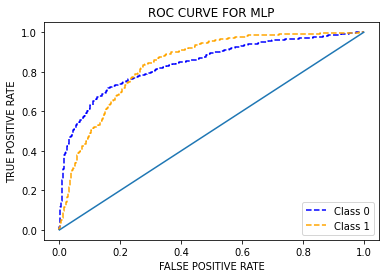

In [93]:
false_positive_rate = {}
true_positive_rate = {}
thresh = {}

cc = clf.predict(X_testt)
cm = metrics.confusion_matrix(y_true = Y_test_M , y_pred = cc , labels = clf.classes_)


#pred_prob = logreg.predict_proba(X_flat_test) 

for i in range(len(cm)):
    false_positive_rate[i] , true_positive_rate[i] , thresh[i] = roc_curve(Y_test_M , prMLP[:,i],pos_label = i)

colors = ['blue' , 'orange' , 'green' , 'red' , 'black' , 'grey' , 'yellow' , 'magenta' , 'cyan' , 'mediumvioletred']
for i in range(len(cm)):
    label = "Class " + str(i)
    plt.plot(false_positive_rate[i] , true_positive_rate[i] , linestyle = '--' , color = colors[i] , label = label)
    plt.title("ROC CURVE FOR MLP")
    plt.xlabel('FALSE POSITIVE RATE')
    plt.ylabel('TRUE POSITIVE RATE')

plt.plot([0,1],[0,1])
plt.legend(loc = "lower right")
plt.show()

## Random Forest Classifier

In [143]:
clf_RF = RandomForestClassifier(max_depth=20, random_state=0)
scores_RF = cross_val_score(clf_RF, X_LR_1, Y_LR_1, cv=10)
scores_RF.mean()

0.754421615112516

## SVM on unbalanced data

In [78]:
arrX=np.array(X_LR_1)

In [79]:
svm_model = SVC(kernel='rbf')
scores_SVM = cross_val_score(svm_model, arrX, Y_LR_1, cv=10)
scores_SVM.mean()

0.7730578761195154

In [80]:
sv = SVC(kernel='rbf')
X_train_s, X_test_s, Y_train_s, Y_test_s = train_test_split(X_LR_1, Y_LR_1, test_size=0.3)
sv.fit(X_train_s, Y_train_s)
pr_s = sv.predict(X_test_s)
svmF1 = metrics.precision_score(Y_test_s, pr_s)
ubsvs = sv.score(X_test_s, Y_test_s)
svmF1

0.705078125

In [81]:
ubsvs

0.7710219922380336

## Plotting F1 scores

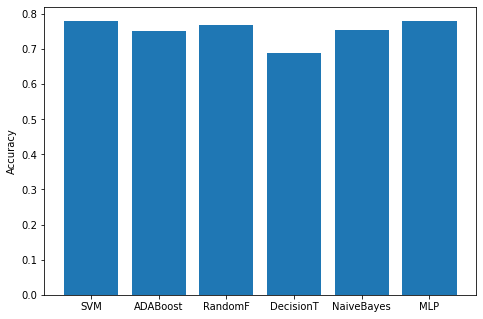

In [198]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
methods = ['SVM', 'ADABoost', 'RandomF', 'DecisionT', 'NaiveBayes', 'MLP']
values = [ubsvs,ubadas,ubRas,ubdts,ubgnbs, ubclfs]
ax.bar(methods,values)
plt.ylabel('Accuracy')
plt.show()

## Trying with more data, considering the earlier 9813 row data with the column having more NaN values removed

In [94]:
data3=data.copy()

In [95]:
data3

,SEQN,BP Systolic,BP Dystolic,Weight,Height,BMI,SAD,is_diabetic,Gender,AgeYears,Race,EduLevelAdult,MaritalStatus,PeopleFamily,PovertyRatio
0,73557,122.00,76.00,78.3,171.3,26.7,20.50,1,Male,69.0,NHBlack,HighSchool/GED,Separated,3,0.84
1,73558,156.00,80.00,89.5,176.8,28.6,24.20,1,Male,54.0,NHWhite,HighSchool/GED,Married,4,1.78
2,73559,140.00,76.00,88.9,175.3,28.9,25.80,1,Male,72.0,NHWhite,College/AA,Married,2,4.51
3,73560,108.00,34.00,32.2,137.3,17.1,14.80,0,Male,9.9,NHWhite,3Grade,NaN,4,2.52
4,73561,136.00,88.00,52.0,162.4,19.7,18.44,1,Female,73.0,NHWhite,College/Above,Married,2,5.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9808,83727,110.00,74.00,71.8,171.3,24.5,19.00,0,Male,26.0,OtherHisp,College/Above,NeverMarried,5,NaN
9809,83728,103.92,31.62,11.3,84.4,15.9,11.85,0,Female,2.0,MexAmerican,NaN,NaN,4,1.95
9810,83729,136.00,82.00,89.6,162.3,34.0,24.40,0,Female,42.0,NHBlack,College/Above,Divorced,1,3.66
9811,83730,94.34,12.98,22.8,119.1,16.1,11.83,0,Male,7.0,OtherHisp,NoEdu/KG,NaN,4,1.05


## Dropping maritalstatus feature as it has 4225 NaN values

In [96]:
data3.drop(['MaritalStatus','BP Systolic','SEQN','Race','EduLevelAdult','PeopleFamily','PovertyRatio'],axis=1,inplace=True)

In [97]:
data3

,BP Dystolic,Weight,Height,BMI,SAD,is_diabetic,Gender,AgeYears
0,76.00,78.3,171.3,26.7,20.50,1,Male,69.0
1,80.00,89.5,176.8,28.6,24.20,1,Male,54.0
2,76.00,88.9,175.3,28.9,25.80,1,Male,72.0
3,34.00,32.2,137.3,17.1,14.80,0,Male,9.9
4,88.00,52.0,162.4,19.7,18.44,1,Female,73.0
...,...,...,...,...,...,...,...,...
9808,74.00,71.8,171.3,24.5,19.00,0,Male,26.0
9809,31.62,11.3,84.4,15.9,11.85,0,Female,2.0
9810,82.00,89.6,162.3,34.0,24.40,0,Female,42.0
9811,12.98,22.8,119.1,16.1,11.83,0,Male,7.0


In [98]:
X_BD = data3.loc[:, data3.columns != 'is_diabetic']
Y_BD = data3.loc[:, data3.columns == 'is_diabetic']

In [99]:
for i in range(len(X_BD)):
    if(X_BD['Gender'][i]=='Male'):
        X_BD['Gender'][i]=0
    else:
        X_BD['Gender'][i]=1

<ipython-input-99-dd1c1ea57e71>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_BD['Gender'][i]=0
/Users/gaganmalik/miniforge3/envs/torch/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3437: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exec(code_obj, self.user_global_ns, self.user_ns)
<ipython-input-99-dd1c1ea57e71>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_BD['Gender'][i]=1


In [100]:
Y_BD

,is_diabetic
0,1
1,1
2,1
3,0
4,1
...,...
9808,0
9809,0
9810,0
9811,0


In [156]:
Y_BD = Y_BD.values.ravel()

In [101]:
Y_BD

,is_diabetic
0,1
1,1
2,1
3,0
4,1
...,...
9808,0
9809,0
9810,0
9811,0


In [102]:
X_BD

,BP Dystolic,Weight,Height,BMI,SAD,Gender,AgeYears
0,76.00,78.3,171.3,26.7,20.50,0,69.0
1,80.00,89.5,176.8,28.6,24.20,0,54.0
2,76.00,88.9,175.3,28.9,25.80,0,72.0
3,34.00,32.2,137.3,17.1,14.80,0,9.9
4,88.00,52.0,162.4,19.7,18.44,1,73.0
...,...,...,...,...,...,...,...
9808,74.00,71.8,171.3,24.5,19.00,0,26.0
9809,31.62,11.3,84.4,15.9,11.85,1,2.0
9810,82.00,89.6,162.3,34.0,24.40,1,42.0
9811,12.98,22.8,119.1,16.1,11.83,0,7.0


In [103]:
X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(X_BD, Y_BD, test_size=0.3, random_state=1) # 70% training and 30% test

In [104]:
clf_BD = DecisionTreeClassifier(random_state=42)
clf_BD = clf_BD.fit(X_train_1,y_train_1)
y_pred_BD = clf_BD.predict(X_test_1)
print("Accuracy:",metrics.accuracy_score(y_test_1, y_pred_BD))

Accuracy: 0.8155570652173914


In [107]:
clf_RF_1 = RandomForestClassifier(max_depth=20, random_state=0)
clf_RF_1 = clf_RF_1.fit(X_train_1,y_train_1.values.ravel())
y_pred_BD_1 = clf_RF_1.predict(X_test_1)
print("Accuracy:",metrics.accuracy_score(y_test_1, y_pred_BD_1))

Accuracy: 0.8552989130434783


In [108]:
clf_RF = RandomForestClassifier(max_depth=20, random_state=0)
scores_RF = cross_val_score(clf_RF, X_BD, Y_BD.values.ravel(), cv=10)

In [109]:
scores_RF.mean()

0.8596750686672024

In [110]:
data3

,BP Dystolic,Weight,Height,BMI,SAD,is_diabetic,Gender,AgeYears
0,76.00,78.3,171.3,26.7,20.50,1,Male,69.0
1,80.00,89.5,176.8,28.6,24.20,1,Male,54.0
2,76.00,88.9,175.3,28.9,25.80,1,Male,72.0
3,34.00,32.2,137.3,17.1,14.80,0,Male,9.9
4,88.00,52.0,162.4,19.7,18.44,1,Female,73.0
...,...,...,...,...,...,...,...,...
9808,74.00,71.8,171.3,24.5,19.00,0,Male,26.0
9809,31.62,11.3,84.4,15.9,11.85,0,Female,2.0
9810,82.00,89.6,162.3,34.0,24.40,0,Female,42.0
9811,12.98,22.8,119.1,16.1,11.83,0,Male,7.0


In [111]:
Y_BD

,is_diabetic
0,1
1,1
2,1
3,0
4,1
...,...
9808,0
9809,0
9810,0
9811,0


## High imbalance present in the data

In [112]:
k_1=0
k_2=0
for i in range(len(Y_BD)):
    if(Y_BD['is_diabetic'][i]==1):
        k_1+=1
    else:
        k_2+=1

In [113]:
print(str(k_1)+" "+str(k_2))

2049 7764


## Oversampling Non diabetic patients using SMOTE

In [114]:
os = SMOTE(random_state=0)
#X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X_BD, Y_BD, test_size=0.3, random_state=0)
#columns = X_train_2.columns
os_data_X,os_data_y=os.fit_resample(X_BD, Y_BD)

In [115]:
os_data_X['Gender'][1]==1

False

In [116]:
os_data_X

,BP Dystolic,Weight,Height,BMI,SAD,Gender,AgeYears
0,76.000000,78.300000,171.300000,26.700000,20.500000,0.0,69.000000
1,80.000000,89.500000,176.800000,28.600000,24.200000,0.0,54.000000
2,76.000000,88.900000,175.300000,28.900000,25.800000,0.0,72.000000
3,34.000000,32.200000,137.300000,17.100000,14.800000,0.0,9.900000
4,88.000000,52.000000,162.400000,19.700000,18.440000,1.0,73.000000
...,...,...,...,...,...,...,...
15523,54.413956,113.237670,158.152099,45.313483,28.179539,1.0,70.551153
15524,77.217781,107.141136,172.847081,35.852919,32.164650,0.0,68.882166
15525,77.314574,62.997691,159.396176,24.866234,19.034885,1.0,47.685426
15526,47.275109,64.369869,164.346943,23.853057,19.943668,0.818777,80.000000


## Oversampling increased the accuracy

## Random Forest After Balancing Data

Train/Test Split

In [117]:
X_train_3, X_test_3, y_train_3, y_test_3 = train_test_split(os_data_X, os_data_y, test_size=0.3, random_state=0)
clf_RF_3 = RandomForestClassifier(max_depth=30, random_state=0)
clf_RF_3 = clf_RF_3.fit(X_train_3,y_train_3.values.ravel())
y_pred_OS_3 = clf_RF_3.predict(X_test_3)
randAcc = metrics.accuracy_score(y_pred_OS_3, y_test_3)
randAcc

0.9034127495170637

Cross Validation K=5

In [118]:
os_data_y = os_data_y.values.ravel()
RF_LR_1_2 = RandomForestClassifier(max_depth=30, random_state=0)
scores_LR_4_2 = cross_val_score(RF_LR_1_2, os_data_X, os_data_y, cv=5)
scores_LR_4_2.mean()

0.9061705928891459

In [119]:
for i in range(len(os_data_X)):
    if(os_data_X['Gender'][i]==1 or os_data_X['Gender'][i]>0.5):
        os_data_X['Gender'][i]=np.int64(1)
    else:
        os_data_X['Gender'][i]=np.int64(0)    

<ipython-input-119-24b3e52c0aab>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  os_data_X['Gender'][i]=np.int64(0)
<ipython-input-119-24b3e52c0aab>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  os_data_X['Gender'][i]=np.int64(1)


In [120]:
os_data_X

,BP Dystolic,Weight,Height,BMI,SAD,Gender,AgeYears
0,76.000000,78.300000,171.300000,26.700000,20.500000,0,69.000000
1,80.000000,89.500000,176.800000,28.600000,24.200000,0,54.000000
2,76.000000,88.900000,175.300000,28.900000,25.800000,0,72.000000
3,34.000000,32.200000,137.300000,17.100000,14.800000,0,9.900000
4,88.000000,52.000000,162.400000,19.700000,18.440000,1,73.000000
...,...,...,...,...,...,...,...
15523,54.413956,113.237670,158.152099,45.313483,28.179539,1,70.551153
15524,77.217781,107.141136,172.847081,35.852919,32.164650,0,68.882166
15525,77.314574,62.997691,159.396176,24.866234,19.034885,1,47.685426
15526,47.275109,64.369869,164.346943,23.853057,19.943668,1,80.000000


## Using SVM

In [121]:
nn = np.array(os_data_X)
nn

array([[76.0, 78.3, 171.3, ..., 20.5, 0, 69.0],
       [80.0, 89.5, 176.8, ..., 24.2, 0, 54.0],
       [76.0, 88.9, 175.3, ..., 25.8, 0, 72.0],
       ...,
       [77.31457426442817, 62.99769110241354, 159.3961762141656, ...,
        19.034884555120676, 1, 47.68542573557182],
       [47.27510888951062, 64.36986933258726, 164.34694305594414, ...,
        19.943668332867034, 1, 80.0],
       [72.0, 97.21101166595693, 167.84263625691995, ...,
        28.42752916489232, 0, 46.47247083510768]], dtype=object)

In [123]:
svm_model = SVC(kernel='rbf')
scores_SVM = cross_val_score(svm_model, nn, os_data_y, cv=10)
scores_SVM.mean()

0.8565824128225383

## Calculating Scores for Balanced Data

In [275]:
svm_g = SVC(kernel='rbf')
scores_SVM = cross_val_score(svm_g, X_train_3, y_train_3.values.ravel(), cv=10)

Ra_g = RandomForestClassifier(max_depth=30, random_state=0)
scores_Ra = cross_val_score(Ra_g, X_train_3, y_train_3.values.ravel(), cv=10)

AdaB_g = AdaBoostClassifier(n_estimators=100, random_state=0)
scores_ada = cross_val_score(AdaB_g, X_train_3, y_train_3.values.ravel(), cv=10)

gnbbb_g = GaussianNB()
scores_gnb = cross_val_score(gnbbb_g, X_train_3, y_train_3.values.ravel(), cv=10)

dctree_g = DecisionTreeClassifier()
scores_dct = cross_val_score(dctree_g, X_train_3, y_train_3.values.ravel(), cv=10)

In [276]:
temppp = [scores_SVM.mean(), scores_Ra.mean(), scores_ada.mean(), scores_gnb.mean(), scores_dct.mean(), mlpcv10]

In [268]:
CVs= list()

In [277]:
CVs.append(temppp)

In [278]:
CVs

[[0.8565644470283023,
  0.8874780717273334,
  0.870089108102956,
  0.8161742363577449,
  0.8402802349444484,
  0.8776561493882807],
 [0.8563807894071719,
  0.8963107485824819,
  0.8726649001228169,
  0.8167272002170994,
  0.8503081855556888,
  0.8776561493882807],
 [0.8564718479400787,
  0.8975066964172262,
  0.8711921062752334,
  0.81626589816702,
  0.8568398332206675,
  0.8776561493882807]]

In [126]:
sc = StandardScaler()
os_data_XX = sc.fit_transform(os_data_X)
X_train_MM, X_test_MM, Y_train_MM, Y_test_MM = train_test_split(os_data_XX, os_data_y, test_size=0.3)

mlpC = MLPClassifier(max_iter=1000, verbose=2, n_iter_no_change=30)

parameter_space = {
    'hidden_layer_sizes': [(100,50,20)],
    'activation': ['relu'],
    'solver': ['adam'],
    'alpha': [0.0001],
    'learning_rate': ['constant'],
}

clff = GridSearchCV(mlpC, parameter_space, n_jobs=-1, cv=10)

clff.fit(X_train_MM, Y_train_MM)
sc=clff.score(X_test_MM, Y_test_MM)
sc

Iteration 1, loss = 0.42996786
Iteration 2, loss = 0.33717363
Iteration 3, loss = 0.33480114
Iteration 4, loss = 0.33199487
Iteration 5, loss = 0.33177308
Iteration 6, loss = 0.33005361
Iteration 7, loss = 0.32992016
Iteration 8, loss = 0.32832896
Iteration 9, loss = 0.32824391
Iteration 10, loss = 0.32763296
Iteration 11, loss = 0.32645610
Iteration 12, loss = 0.32562822
Iteration 13, loss = 0.32599073
Iteration 14, loss = 0.32518976
Iteration 15, loss = 0.32520232
Iteration 16, loss = 0.32329518
Iteration 17, loss = 0.32396558
Iteration 18, loss = 0.32318255
Iteration 19, loss = 0.32305266
Iteration 20, loss = 0.32149911
Iteration 21, loss = 0.32085847
Iteration 22, loss = 0.32095019
Iteration 23, loss = 0.32024891
Iteration 24, loss = 0.31928054
Iteration 25, loss = 0.31876242
Iteration 26, loss = 0.31859335
Iteration 27, loss = 0.31803550
Iteration 28, loss = 0.31725072
Iteration 29, loss = 0.31627838
Iteration 30, loss = 0.31583871
Iteration 31, loss = 0.31666921
Iteration 32, los

Iteration 259, loss = 0.21341751
Iteration 260, loss = 0.21378499
Iteration 261, loss = 0.21292600
Iteration 262, loss = 0.21182002
Iteration 263, loss = 0.21337273
Iteration 264, loss = 0.20914597
Iteration 265, loss = 0.21469617
Iteration 266, loss = 0.21850215
Iteration 267, loss = 0.21140900
Iteration 268, loss = 0.20898764
Iteration 269, loss = 0.21099383
Iteration 270, loss = 0.21245791
Iteration 271, loss = 0.21342759
Iteration 272, loss = 0.21259654
Iteration 273, loss = 0.21132470
Iteration 274, loss = 0.21131591
Iteration 275, loss = 0.20879697
Iteration 276, loss = 0.21016655
Iteration 277, loss = 0.20984884
Iteration 278, loss = 0.20789751
Iteration 279, loss = 0.20882180
Iteration 280, loss = 0.20703245
Iteration 281, loss = 0.20635559
Iteration 282, loss = 0.21176548
Iteration 283, loss = 0.20659232
Iteration 284, loss = 0.20939487
Iteration 285, loss = 0.20486958
Iteration 286, loss = 0.20789855
Iteration 287, loss = 0.20522626
Iteration 288, loss = 0.20527461
Iteration 

Iteration 512, loss = 0.15967619
Iteration 513, loss = 0.16196378
Iteration 514, loss = 0.16123217
Iteration 515, loss = 0.16333129
Iteration 516, loss = 0.16173781
Iteration 517, loss = 0.16739347
Iteration 518, loss = 0.15542557
Iteration 519, loss = 0.15452334
Iteration 520, loss = 0.15726325
Iteration 521, loss = 0.16556819
Iteration 522, loss = 0.16113784
Iteration 523, loss = 0.15720750
Iteration 524, loss = 0.15777556
Iteration 525, loss = 0.15804555
Iteration 526, loss = 0.16075695
Iteration 527, loss = 0.15931395
Iteration 528, loss = 0.15481139
Iteration 529, loss = 0.16073374
Iteration 530, loss = 0.16161794
Iteration 531, loss = 0.15522334
Iteration 532, loss = 0.16644645
Iteration 533, loss = 0.16236895
Iteration 534, loss = 0.16369402
Iteration 535, loss = 0.15654240
Iteration 536, loss = 0.15472075
Iteration 537, loss = 0.15902366
Iteration 538, loss = 0.15737831
Iteration 539, loss = 0.15526928
Iteration 540, loss = 0.15509693
Iteration 541, loss = 0.15234416
Iteration 

Iteration 767, loss = 0.12480202
Iteration 768, loss = 0.12786609
Iteration 769, loss = 0.12119626
Iteration 770, loss = 0.13328502
Iteration 771, loss = 0.13013764
Iteration 772, loss = 0.12928282
Iteration 773, loss = 0.13419669
Iteration 774, loss = 0.12488086
Iteration 775, loss = 0.12230545
Iteration 776, loss = 0.12428730
Iteration 777, loss = 0.12217688
Iteration 778, loss = 0.12938348
Iteration 779, loss = 0.12730474
Iteration 780, loss = 0.12475647
Iteration 781, loss = 0.12383431
Iteration 782, loss = 0.12706120
Iteration 783, loss = 0.12803563
Iteration 784, loss = 0.12111212
Iteration 785, loss = 0.12479013
Iteration 786, loss = 0.12381820
Iteration 787, loss = 0.12137012
Iteration 788, loss = 0.14032816
Iteration 789, loss = 0.12237865
Iteration 790, loss = 0.13017033
Iteration 791, loss = 0.12295730
Iteration 792, loss = 0.12303231
Iteration 793, loss = 0.11634367
Iteration 794, loss = 0.12345839
Iteration 795, loss = 0.12478354
Iteration 796, loss = 0.12460228
Iteration 

0.8759390427130286

In [239]:
ssa = clff.predict(X_test_MM)
sc = metrics.f1_score(Y_test_MM, ssa)

In [243]:
mlpcv2 = sc

In [252]:
mlpcv10

0.8776561493882807

In [245]:
mlpcv5 = sc

In [247]:
mlpcv10 = sc

In [241]:
values

[0.8678102926337034,
 0.877432712215321,
 0.9060150375939849,
 0.8456896551724137,
 0.83531669865643,
 0.8830313014827019]

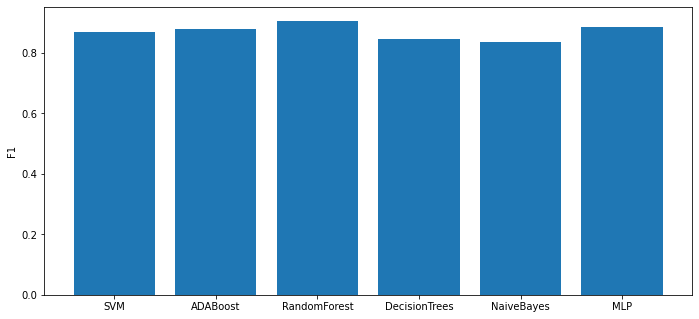

In [240]:
figg = plt.figure()
axi = figg.add_axes([0,0,1.5,1])
methods = ['SVM', 'ADABoost', 'RandomForest', 'DecisionTrees', 'NaiveBayes', 'MLP']
values = [svmScore,AdaScore,RaScore,dtScore,gnbScore, sc]
axi.bar(methods,values)
plt.ylabel('F1')
plt.show()

In [233]:
RaScore

0.9034127495170637

In [307]:
CVss = np.round(np.array(CVs), decimals=3)
CVs2 = CVss.tolist()
CVs2

[[0.857, 0.887, 0.87, 0.816, 0.84, 0.878],
 [0.856, 0.896, 0.873, 0.817, 0.85, 0.878],
 [0.856, 0.898, 0.871, 0.816, 0.857, 0.878]]

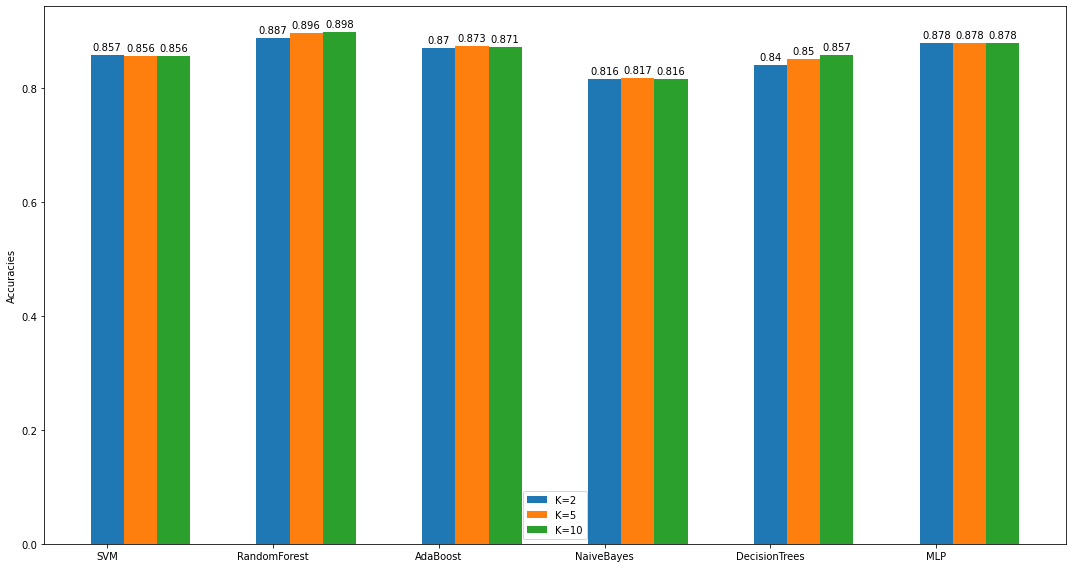

In [310]:
xax = np.arange(6)
figu, axx = plt.subplots(figsize=(15,8))
width = 0.2
methods = ['SVM', 'RandomForest', 'AdaBoost', 'NaiveBayes', 'DecisionTrees', 'MLP']
rects1 = axx.bar(xax, CVs2[0], width, label='K=2')
rects2 = axx.bar(xax + width, CVs2[1], width, label='K=5')
rects3 = axx.bar(xax + (2 * width), CVs2[2], width, label='K=10')

axx.set_ylabel('Accuracies')
axx.set_xticks(xax)
axx.set_xticklabels(methods)
axx.legend()

axx.bar_label(rects1, padding=3)
axx.bar_label(rects2, padding=3)
axx.bar_label(rects3, padding=3)


figu.tight_layout()

plt.show()